In [1]:
# Load the faces datasets
from sklearn.datasets import fetch_olivetti_faces
dataset = fetch_olivetti_faces(shuffle=True, random_state=17)
faces = dataset.data

In [2]:
n_samples, n_features = faces.shape

# global centering
faces_centered = faces - faces.mean(axis=0)

# local centering
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

print("Dataset consists of %d faces" % n_samples)

Dataset consists of 400 faces


In [31]:
fetch_olivetti_faces().target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [3]:
faces = fetch_olivetti_faces() # download the dataset at ~/scikit_learn_data
print("Keys:", faces.keys()) # display keys
print("Total samples and image size:", faces.images.shape)
print("Total samples and features:", faces.data.shape)
print("Total samples and targets:", faces.target.shape)

Keys: dict_keys(['data', 'images', 'target', 'DESCR'])
Total samples and image size: (400, 64, 64)
Total samples and features: (400, 4096)
Total samples and targets: (400,)


In [4]:
print(faces.images[0].shape)

(64, 64)


In [5]:
print(faces.data[0].shape)

(4096,)


In [6]:
print(faces.target[0].size)

1


In [7]:
print(faces.images[0])

[[0.30991736 0.3677686  0.41735536 ... 0.37190083 0.3305785  0.30578512]
 [0.3429752  0.40495867 0.43801653 ... 0.37190083 0.338843   0.3140496 ]
 [0.3429752  0.41735536 0.45041323 ... 0.38016528 0.338843   0.29752067]
 ...
 [0.21487603 0.20661157 0.2231405  ... 0.15289256 0.16528925 0.17355372]
 [0.20247933 0.2107438  0.2107438  ... 0.14876033 0.16115703 0.16528925]
 [0.20247933 0.20661157 0.20247933 ... 0.15289256 0.16115703 0.1570248 ]]


In [8]:
print(faces.data[0])

[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]


In [9]:
print(faces.target[0])

0


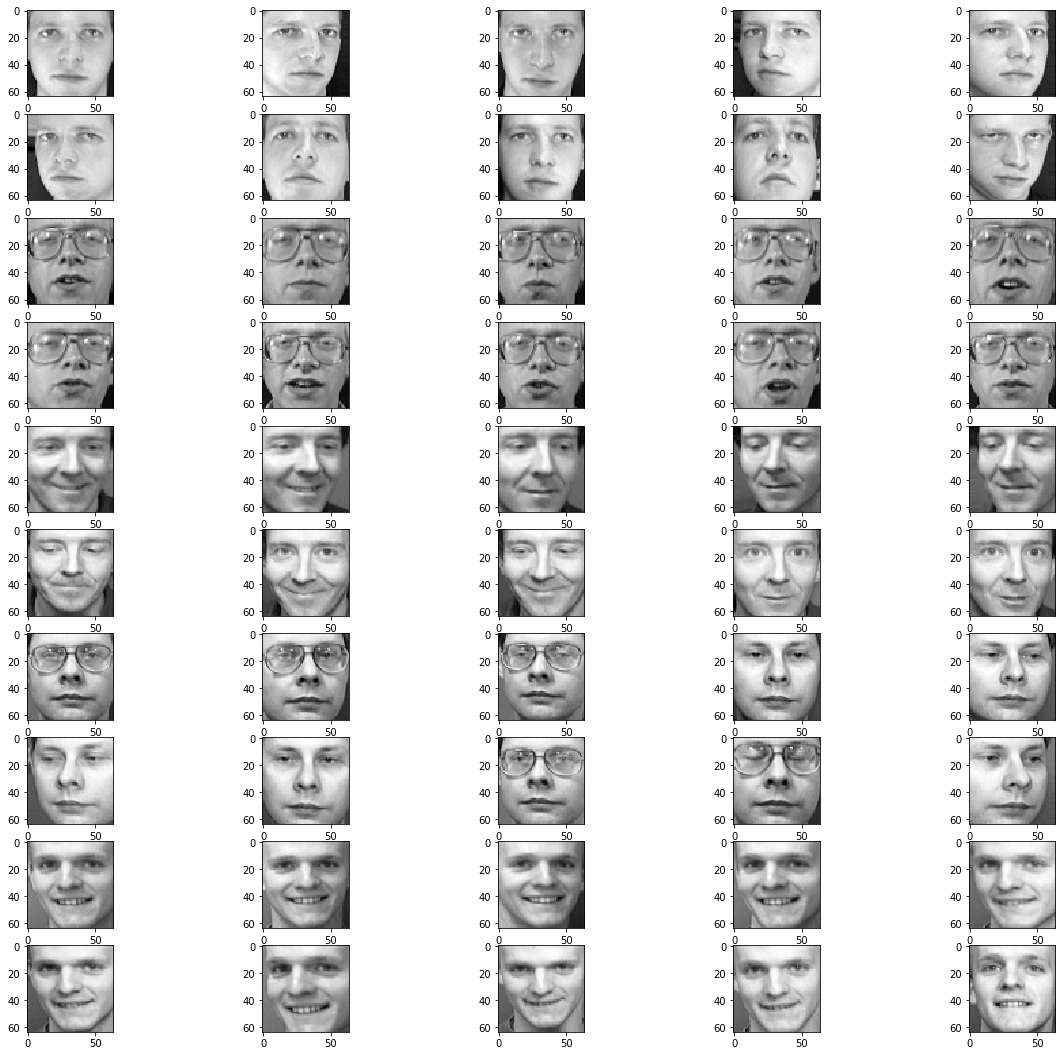

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
faces = fetch_olivetti_faces() # download the dataset at ~/scikit_learn_data
# print("Keys:", faces.keys()) # display keys
# print("Total samples and image size:", faces.images.shape)
# print("Total samples and features:", faces.data.shape)
# print("Total samples and targets:", faces.target.shape)

images = faces.images # save images

# note that images can not be saved as features, as we need 2D data for
# features, whereas faces.images are 3D data i.e. (samples, pixel-x, pixel-y)
features = faces.data  # features
targets = faces.target # targets

fig = plt.figure(figsize = [20.4, 18.8]) # create a new figure window
for i in range(50): # display 50 images
    # subplot : 10 rows and 5 columns
    img_grid = fig.add_subplot(10, 5, i+1)
    # plot features as image
    img_grid.imshow(images[i],cmap=plt.cm.gray)
plt.show();

Accuracy for training data (self accuracy): 1.0
Accuracy for test data: 1.0
Wrongly detected image-locations:  

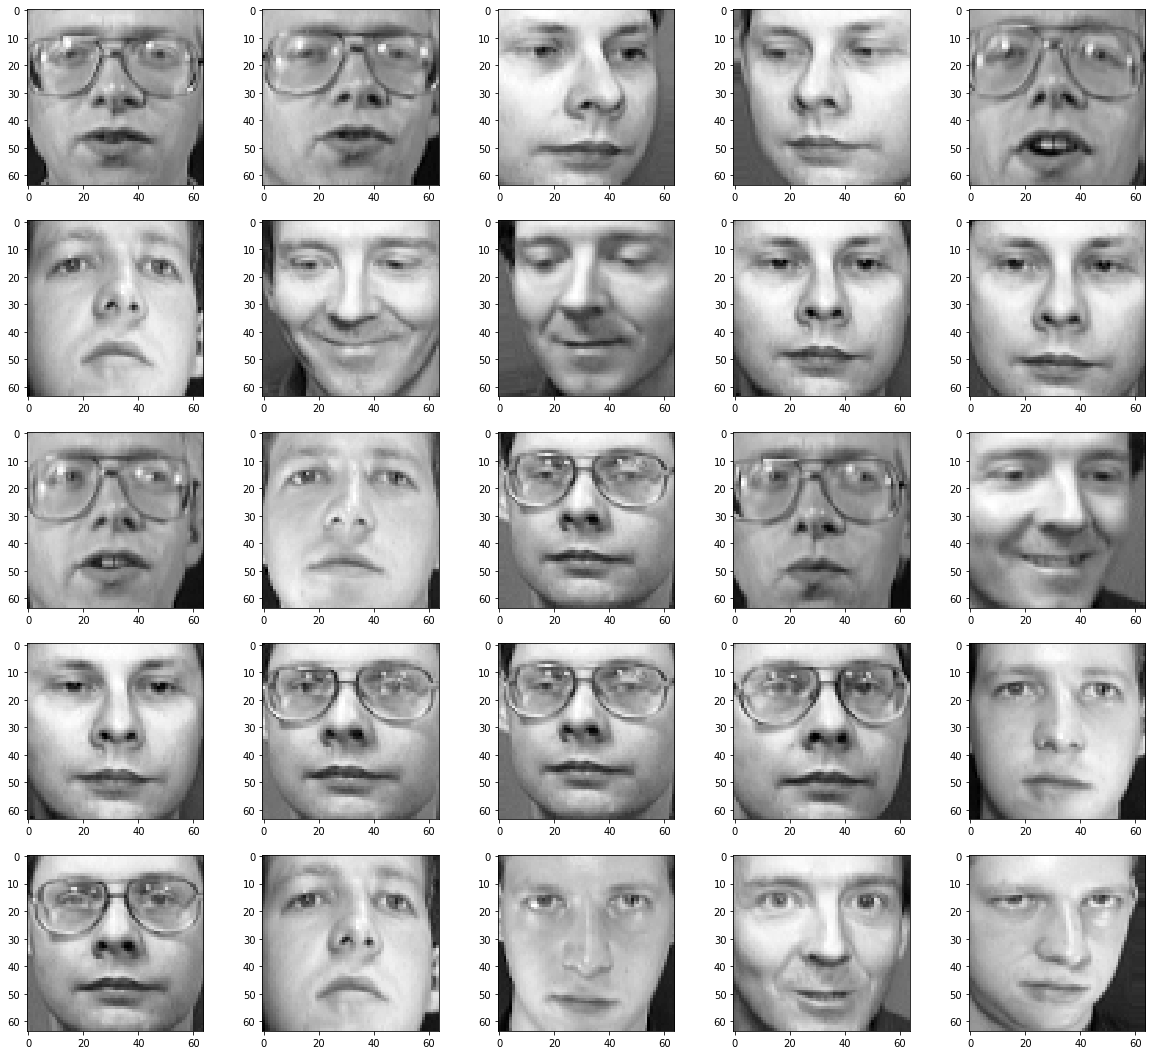

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# function for plotting images
def plot_images(images, total_images=25, rows=5, cols=5):
    fig = plt.figure(figsize = [20.4, 18.8]) # create a new figure window
    for i in range(total_images): # display 25 images
        # subplot : 5 rows and 5 columns
        img_grid = fig.add_subplot(rows, cols, i+1)
        # plot features as image
        img_grid.imshow(images[i],cmap=plt.cm.gray)

faces = fetch_olivetti_faces() # download the dataset at ~/scikit_learn_data
# print("Keys:", faces.keys()) # display keys
# print("Total samples and image size:", faces.images.shape)
# print("Total samples and features:", faces.data.shape)
# print("Total samples and targets:", faces.target.shape)

images = faces.images # save images

# note that images can not be saved as features, as we need 2D data for
# features, whereas faces.images are 3D data i.e. (samples, pixel-x, pixel-y)
features = faces.data  # features
targets = faces.target # targets

# # plot 10 images with 2 rows and 5 columns
# plot_images(images, 10, 2, 5)
# plt.show()

# split the training and test data
train_features, test_features, train_targets, test_targets = train_test_split(
        features, targets,
        train_size=0.8,
        test_size=0.2,
        # random but same for all run, also accuracy depends on the
        # selection of data e.g. if we put 10 then accuracy will be 1.0
        # in this example
        random_state=17,
        # keep same proportion of 'target' in test and target data
        stratify=targets
    )

# use SVC
#classifier = SVC(kernel="linear") # default kernel=rbf
# use KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1,p=1)
# training using 'training data'
classifier.fit(train_features, train_targets) # fit the model for training data

# predict the 'target' for 'training data'
prediction_training_targets = classifier.predict(train_features)
self_accuracy = accuracy_score(train_targets, prediction_training_targets)
print("Accuracy for training data (self accuracy):", self_accuracy)

# predict the 'target' for 'test data'
prediction_test_targets = classifier.predict(test_features)
test_accuracy = accuracy_score(test_targets, prediction_test_targets)
print("Accuracy for test data:", test_accuracy)


# location of error for first 50 images in test data
print("Wrongly detected image-locations: ", end=' ')
for i in range (25):
    # if images are not same then print location of images
    if test_targets[i] != prediction_test_targets[i]:
        print(i)

# store test images in list
faces_test = []
for i in test_targets:
    faces_test.append(images[i])

# store predicted images in list
faces_predict = []
for i in prediction_test_targets:
    faces_predict.append(images[i])

# plot the first 25 images from the list
plot_images(faces_test, total_images=25)
plt.show()

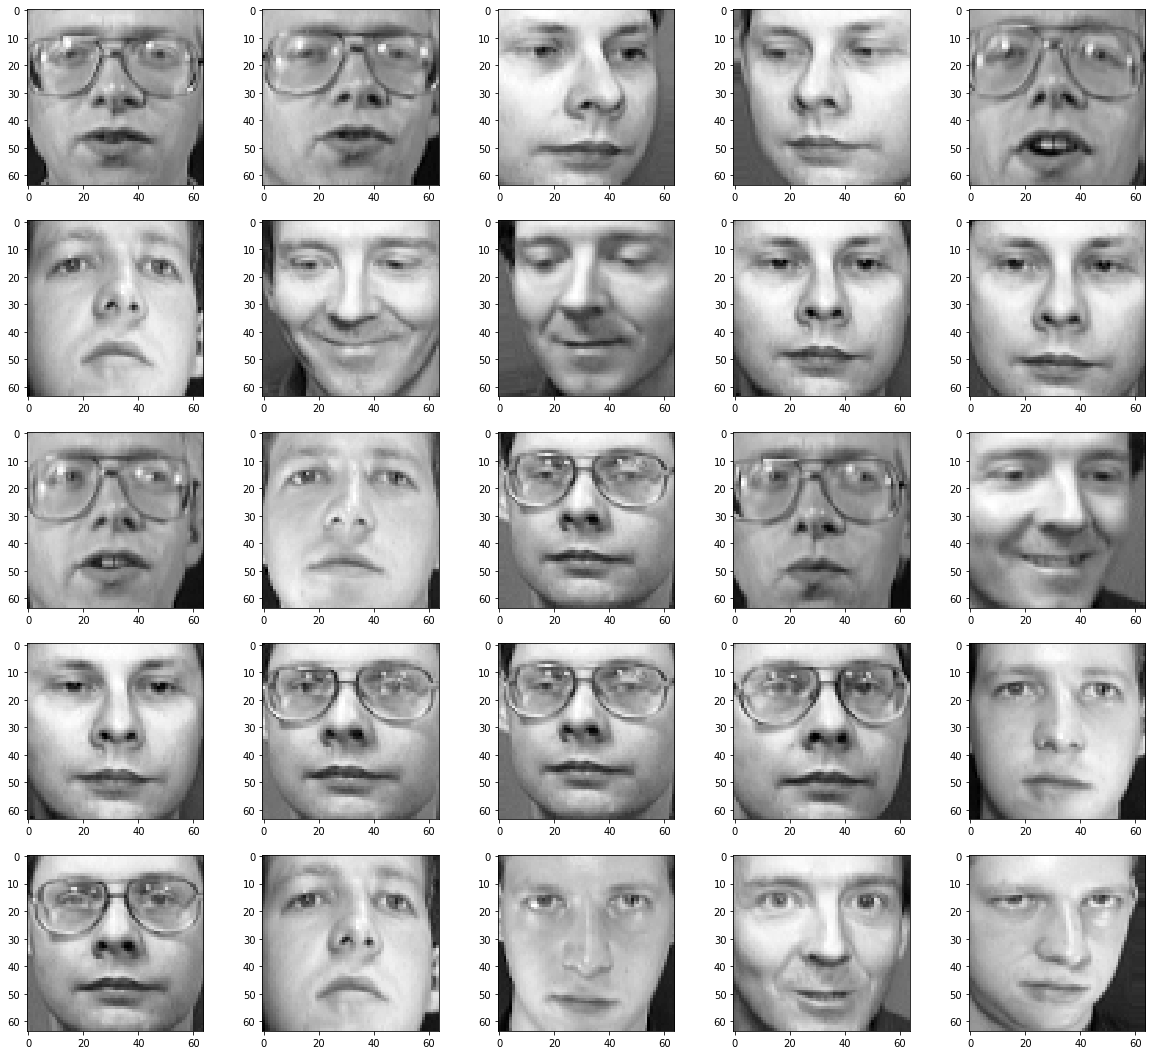

In [12]:
# take alook on our predictions to check if they are really identical
plot_images(faces_predict, total_images=25);